In [16]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [17]:
dataset = 'model/keypoint_classifier/data.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [18]:
NUM_CLASSES = 2

# Dataset reading

In [19]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [20]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [23]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,092 (4.27 KB)

 Trainable params: 1,092 (4.27 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [25]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [26]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 2/19 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.5078 - loss: 0.7248
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5337 - loss: 0.7076 - val_accuracy: 0.7300 - val_loss: 0.6301
Epoch 2/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5938 - loss: 0.6684
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5703 - loss: 0.6737 - val_accuracy: 0.8295 - val_loss: 0.5901
Epoch 3/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5703 - loss: 0.6727
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6219 - loss: 0.6410 - val_accuracy: 0.9031 - val_loss: 0.5519
Epoch 4/1000
 1/19 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6016 - loss: 0.6352
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [27]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9918 - loss: 0.0491


In [28]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [29]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
[0.00899243 0.9910076 ]
1


# Confusion matrix

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


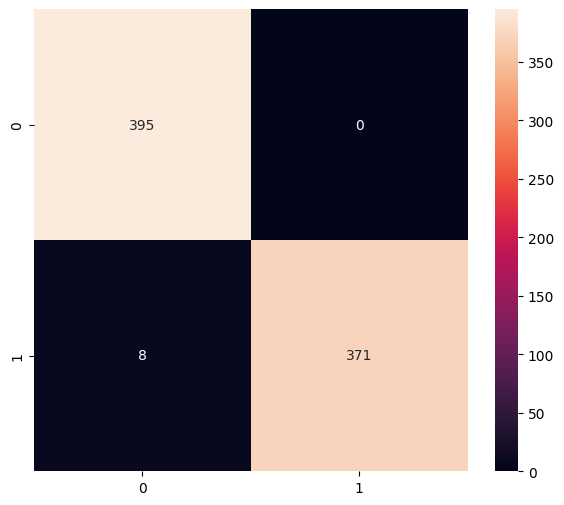

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       395
           1       1.00      0.98      0.99       379

    accuracy                           0.99       774
   macro avg       0.99      0.99      0.99       774
weighted avg       0.99      0.99      0.99       774



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [31]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [32]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpeqp_m0lx\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmpeqp_m0lx\assets


Saved artifact at 'C:\Users\USER\AppData\Local\Temp\tmpeqp_m0lx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  2650184700304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2650184149776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2650202883472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2650202885584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2650202882704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2650202885968: TensorSpec(shape=(), dtype=tf.resource, name=None)


6452

# Inference test

In [33]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [34]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [35]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [36]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 28.5 ms


In [37]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00899242 0.9910076 ]
1
